<a href="https://colab.research.google.com/github/azimhims/azimhims/blob/main/Pretrain_with_FineTune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`1. Pretrain Model`**
example of Pretrain Model with resnet50

Roadmap of Pretrain Model

1. Import required Libraries
2. create a object of that model
3. inject new picture.
4. load the image and change the size of picture as mention in model specificaiton
5. convert the image into array
6. convert the array into expand_dimension array
7. use the function of model prediction
8. decode the predction result and print the result


In [132]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

Q1. How to get the summary of models

In [2]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Q. How to get pipeline of Model

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.863494 to fit



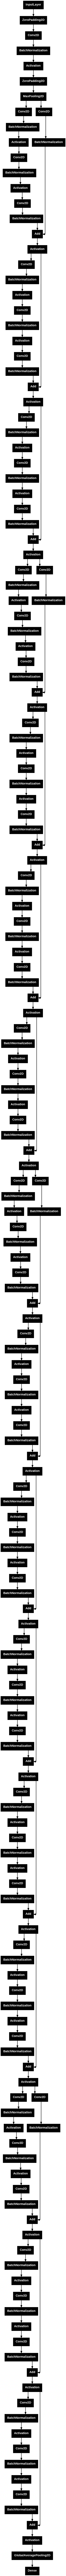

In [4]:

from keras.utils import plot_model
plot_model(model)

Q. How to Get weight,bias of model layers

In [5]:
for i in model.layers:
    print(i.get_weights())

Streaming output truncated to the last 5000 lines.
        [[ 4.49125795e-03,  1.14042712e-02,  1.20070192e-03, ...,
          -9.69814043e-03, -8.75886716e-03,  8.14067107e-03],
         [ 7.92150479e-03, -8.15901381e-04,  4.71630832e-03, ...,
           6.65962882e-03,  1.05609186e-02, -3.28106387e-03],
         [ 7.59417983e-03, -9.30252578e-03,  3.41602415e-03, ...,
           1.75050553e-03, -1.72676425e-02, -3.26268487e-02],
         ...,
         [-1.38811162e-02, -3.98405548e-03,  1.12859271e-02, ...,
           9.76209063e-03, -3.36737256e-03, -6.67657005e-03],
         [ 1.35345040e-02, -1.72817856e-02,  2.99297981e-02, ...,
          -1.37071917e-03, -2.52669547e-02, -2.90748868e-02],
         [ 1.14214877e-02, -9.23241256e-04, -1.07366145e-02, ...,
          -2.07532309e-02,  1.12588732e-02, -1.38983538e-03]],

        [[-1.34896282e-02,  9.42760520e-03, -4.52349335e-03, ...,
           2.42592450e-02,  3.90870795e-02,  2.58674305e-02],
         [-8.67180247e-03, -1.0178663

Now time to test a general picture and get the ansser from model

In [139]:
# now time to upload the new picture for prediction
image_path = '/content/arslana4.jpg'
img = image.load_img(image_path, target_size=(224, 224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
this is crash_helmet and Confidence 74.2020308971405%


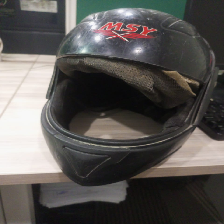

In [140]:
# now time to converto image into array
pic = image.img_to_array(img)
# its time to convert into ndaimension
pic = np.expand_dims(pic, axis=0)
result = model.predict(pic)
result = decode_predictions(result, top=1)
for i in result:
  confidence_percentage = i[0][2] * 100

  print(f"this is {i[0][1]} and Confidence {confidence_percentage}%")
img

### **Pretrain Transfer Learning **
with the help of resnet50, VVG16, imagenet etc.....

Roadmap
1. import the required libraries
2. create the object of model


In [1]:
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [2]:
#model = ResNet50(weights='imagenet', include_top = False, input_shape=(224,224,3))
modelv = VGG16(weights='imagenet', include_top = False, input_shape=(150,150,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


after create a object, we need to analysis the model, how many trainable and non trainable parameter. weights, bias

In [143]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# for layer in model.layers:
#   layer.trainable = False

In [108]:
# model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [130]:
# for i in modelvvg.layers:
#   print(i.name, i.trainable)

input_layer_8 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [110]:
# for layer in model.layers:
#   if layer.name.startswith('conv5'):
#     layer.trainable = True


In [111]:
# for layer in model.layers:
#   print(layer.name, layer.trainable)

input_layer_7 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1

In [3]:
from keras import Sequential
from keras.layers import Dense, Flatten



In [4]:
model = Sequential()
model.add(modelv)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5,activation = 'softmax'))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
root_dir = '/content/drive/MyDrive/family'

In [7]:
import os
from PIL import Image
#root_dir = '/content/drive/MyDrive/family'

# Define the desired dimensions
width = 800
height = 600

# Loop through each folder
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)

    # Check if it's a folder
    if os.path.isdir(folder_path):
        # Loop through each image in the folder
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)

            # Check if it's an image file
            if image_path.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                # Open the image
                img = Image.open(image_path)

                # Resize the image
                img = img.resize((width, height))

                # Save the resized image
                img.save(image_path)

                print(f"Resized {image_path}")


Resized /content/drive/MyDrive/family/4/WhatsApp Image 2024-09-10 at 23.18.45_b9981add.jpg
Resized /content/drive/MyDrive/family/4/403.jpg
Resized /content/drive/MyDrive/family/4/404.jpg
Resized /content/drive/MyDrive/family/4/401.jpg
Resized /content/drive/MyDrive/family/4/406.jpg
Resized /content/drive/MyDrive/family/4/402.jpg
Resized /content/drive/MyDrive/family/4/408.jpg
Resized /content/drive/MyDrive/family/4/409.jpg
Resized /content/drive/MyDrive/family/4/410.jpg
Resized /content/drive/MyDrive/family/4/405.jpg
Resized /content/drive/MyDrive/family/4/412.jpg
Resized /content/drive/MyDrive/family/4/407.jpg
Resized /content/drive/MyDrive/family/4/413.jpg
Resized /content/drive/MyDrive/family/4/411.jpg
Resized /content/drive/MyDrive/family/4/418.jpg
Resized /content/drive/MyDrive/family/4/414.jpg
Resized /content/drive/MyDrive/family/4/417.jpg
Resized /content/drive/MyDrive/family/4/415.jpg
Resized /content/drive/MyDrive/family/4/416.jpg
Resized /content/drive/MyDrive/family/4/420.j

In [10]:
import splitfolders
#splitfolders.fixed(root_dir, output="familysample", seed=1337, fixed=(13, 13), oversample=False, group_prefix=None)
splitfolders.ratio(root_dir, output="fam_sample", seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 233 files [00:01, 182.29 files/s]


In [9]:
!pip install split-folders

In [11]:
# need to install imagegenerator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

In [58]:
train = '/content/fam_sample/train'
train_data = train_gen.flow_from_directory(directory=train, target_size=(224,224), batch_size=32)
valid_data = '/content/fam_sample/val'
valid_data = val_gen.flow_from_directory(directory=valid_data, target_size=(224,224), batch_size=32)
test_data = '/content/fam_sample/test'
test_data = test_gen.flow_from_directory(directory=test_data, target_size=(224,224), batch_size=32)


Found 184 images belonging to 5 classes.
Found 20 images belonging to 5 classes.
Found 29 images belonging to 5 classes.


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
        train_data,
        steps_per_epoch=5,
        batch_size=16,
        epochs=5,
        validation_data=valid_data,
        #validation_steps = len(valid_generator),
        validation_freq=1,
        verbose=1)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 152s 29s/step - accuracy: 0.2371 - loss: 5.4469 - val_accuracy: 0.2000 - val_loss: 1.9472
Epoch 2/5
1/5 ━━━━━━━━━━━━━━━━━━━━ 1:58 30s/step - accuracy: 0.2812 - loss: 1.8532

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.2812 - loss: 1.8532 - val_accuracy: 0.2000 - val_loss: 1.6779
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 151s 29s/step - accuracy: 0.1774 - loss: 1.8141 - val_accuracy: 0.2000 - val_loss: 1.6523
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.1562 - loss: 1.7031 - val_accuracy: 0.2000 - val_loss: 1.7791
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 161s 29s/step - accuracy: 0.2369 - loss: 1.6520 - val_accuracy: 0.2500 - val_loss: 1.6035


<function matplotlib.pyplot.show(close=None, block=None)>

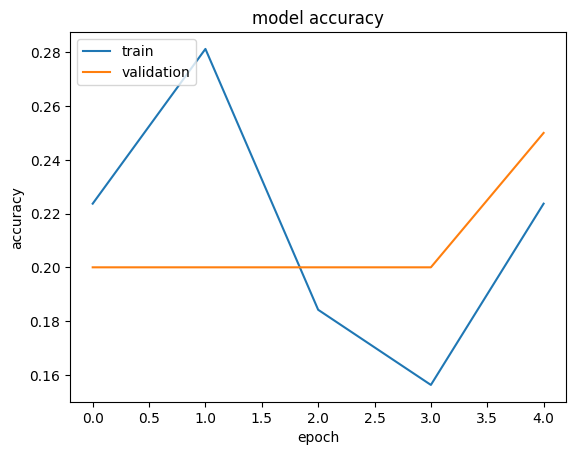

In [18]:
# need to add matplot lib
import matplotlib.pyplot as plt
# i want to add the accury and loss graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show

In [27]:
# need to add new picture for prdict
from PIL import Image
import numpy as np
from keras.preprocessing import image
image_path = '/content/latest1.jpg'
img = image.load_img(image_path, target_size=(150, 150))

In [32]:
# new picture has been loaded into img, now time to predict with model
pic = image.img_to_array(img)
pic = np.expand_dims(pic, axis=0)
result = model.predict(pic)
result = np.argmax(result)
print(result)
# now need to get max three result of each prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1
[]


### Pretain Model, Transfer Learning Now FINE TUNE THE MODEL

In [40]:
#i want to finetune the above model
# from keras.applications.vgg16 import VGG16
# from keras.models import Sequential
# from keras.layers import Dense, Flatten
model = VGG16(weights='imagenet' , input_shape=(224,224,3))

In [65]:
vmodel = VGG16(weights='imagenet', include_top = False, input_shape=(224,224,3))

In [66]:
#now neeed to fine tune where trainable parameter of block5 would be true and other remain freez
for layer in vmodel.layers:
  layer.trainable = False
  if layer.name.startswith('block5'):
    layer.trainable = True

In [67]:
for layer in vmodel.layers:
  print(layer.name, layer.trainable)

input_layer_8 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [70]:
# need to add dropout library
from keras.layers import Dropout
# i want add fine tune feature of drop out after dense layer
modelg = Sequential()
modelg.add(vmodel)
modelg.add(Flatten())


modelg.add(Dense(256, activation='relu'))
modelg.add(Dropout(0.5))
modelg.add(Dense(256,activation = 'relu'))
modelg.add(Dropout(0.5))
modelg.add(Dense(5,activation = 'softmax'))

In [71]:
modelg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
# now want fit the model
# now need to add early stoping in modelg.fit
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)
history = modelg.fit  (
        train_data,
        callbacks=[early_stopping_monitor],

        steps_per_epoch=5,
        batch_size=16,
        epochs=10,
        validation_data=valid_data)
        #validation_steps = len(valid

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 143s 29s/step - accuracy: 0.2288 - loss: 1.6147 - val_accuracy: 0.3500 - val_loss: 1.5958
Epoch 2/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 1:15 19s/step - accuracy: 0.2083 - loss: 1.8143

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.2083 - loss: 1.8143 - val_accuracy: 0.4000 - val_loss: 1.4672
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 153s 26s/step - accuracy: 0.2399 - loss: 1.7761 - val_accuracy: 0.1500 - val_loss: 1.6137
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.3750 - loss: 1.5874 - val_accuracy: 0.3500 - val_loss: 1.5717
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 164s 28s/step - accuracy: 0.2623 - loss: 1.6367 - val_accuracy: 0.2000 - val_loss: 1.6154
